## We will compare the performance of a GP trained using two methods. 
> Min Max Latin HyperCube Sampling

> Active learning sampling (Emukit)

### Generate 50 initial design points using LHS which will be used as common initial data for both methods

In [1]:
from emukit.core.initial_designs.latin_design import LatinDesign
from emukit.core import ParameterSpace, ContinuousParameter

import run_simple_energy_loss_parallel_pool

import pandas as pd
import numpy as np

import os

In [2]:
simulation = run_simple_energy_loss_parallel_pool.run_simulation

In [3]:
pT_range = (1, 10, 10) # Compute more observable than needed to avoid boundry unstabilities.
pT_obs = [5] # p_T Observables we will use for the analysis

In [4]:
parameter_space = ParameterSpace([ContinuousParameter('alpha_s', 0.1,0.4 ),
                                  ContinuousParameter('exponent_inel', -2, 2),
                                  ContinuousParameter('exponent_el', -2, 2),
                                  ContinuousParameter('scale_inel', 0.1, 0.4),
                                  ContinuousParameter('scale_el', 0.1, 0.4)])

In [5]:
param_keys = ['alpha_s','exponent_inel','exponent_el','scale_inel', 'scale_el']
result_keys = ['pT {} GeV'.format(str(i)) for i in np.linspace(*pT_range)]
clms_names = np.hstack((param_keys,result_keys))
print(clms_names)

['alpha_s' 'exponent_inel' 'exponent_el' 'scale_inel' 'scale_el'
 'pT 1.0 GeV' 'pT 2.0 GeV' 'pT 3.0 GeV' 'pT 4.0 GeV' 'pT 5.0 GeV'
 'pT 6.0 GeV' 'pT 7.0 GeV' 'pT 8.0 GeV' 'pT 9.0 GeV' 'pT 10.0 GeV']


In [6]:
if os.path.exists('lhs.csv'):
    lhs_df = pd.read_csv('lhs.csv')
    
else:
    design = LatinDesign(parameter_space) 
    # Keep the first 50 as initial training point for active learning. 
    # Use all 100 to train a GP
    num_data_points = 100 
    X = design.get_samples(num_data_points)
    Y_all = simulation(X,*pT_range)
    lhs_data=np.hstack((X,Y_all))
    print(lhs_data.shape)
    print('saving the lhs to a csv file')
    lhs_df = pd.DataFrame(lhs_data,columns=clms_names)
    # Write dataframe to file
    lhs_df.to_csv('lhs.csv', index = False)

In [7]:
lhs_df.head()

,alpha_s,exponent_inel,exponent_el,scale_inel,scale_el,pT 1.0 GeV,pT 2.0 GeV,pT 3.0 GeV,pT 4.0 GeV,pT 5.0 GeV,pT 6.0 GeV,pT 7.0 GeV,pT 8.0 GeV,pT 9.0 GeV,pT 10.0 GeV
0,0.2695,-1.86,-0.94,0.2845,0.2605,0.722991,0.843341,0.154389,0.071179,0.044701,0.033093,0.027051,0.023217,0.019802,0.016016
1,0.3865,-1.10,-1.54,0.2815,0.3295,0.319529,0.402466,0.026047,0.007113,0.003204,0.001905,0.001329,0.000977,0.000688,0.000442
2,0.2635,0.10,-0.30,0.1945,0.2845,0.739818,0.809835,0.321622,0.219820,0.180239,0.160985,0.150460,0.143824,0.137645,0.129461
3,0.1405,0.58,1.14,0.1885,0.1075,0.887394,0.912874,0.703802,0.633600,0.600516,0.582871,0.572930,0.566833,0.560965,0.551986
4,0.2185,1.90,-0.46,0.3685,0.2875,0.793692,0.828440,0.553116,0.469929,0.432635,0.413412,0.402882,0.396516,0.390257,0.380507


In [8]:
start_n = 50
X_all = np.array(lhs_df.iloc[:,:5])
Y_all = np.array(lhs_df.iloc[:,5:])
X_init = X_all[:50,:]
Y_init = Y_all[:50,:]

print(f'Shape of initial design {X_init.shape} and initial observables {Y_init.shape}')

Shape of initial design (50, 5) and initial observables (50, 10)


In [9]:
# Load validation data
validation_df = pd.read_csv('validation.csv', index_col=0)
X_valid = np.array(validation_df.iloc[:,:5])
Y_valid = np.array(validation_df.iloc[:,5:])
print(f'Shape of validation design {X_valid.shape} and validation observables {Y_valid.shape}')
validation_df.head()

Shape of validation design (100, 5) and validation observables (100, 10)


,alpha_s,exponent_inel,exponent_el,scale_inel,scale_el,pT 1.0 GeV,pT 2.0 GeV,pT 3.0 GeV,pT 4.0 GeV,pT 5.0 GeV,pT 6.0 GeV,pT 7.0 GeV,pT 8.0 GeV,pT 9.0 GeV,pT 10.0 GeV
0,0.139880,1.233532,0.023331,0.277208,0.310282,0.923065,0.944544,0.765945,0.703582,0.673583,0.657323,0.648015,0.642235,0.636743,0.628520
1,0.332736,-0.131905,0.751403,0.212024,0.279861,0.688620,0.791497,0.175990,0.092273,0.064660,0.052266,0.045716,0.041578,0.037848,0.033352
2,0.370226,1.457209,-0.285213,0.201070,0.190545,0.568233,0.665193,0.114913,0.051152,0.031581,0.023231,0.018968,0.016290,0.013855,0.011014
3,0.259227,-0.766722,-1.405136,0.164316,0.136741,0.803727,0.875761,0.366005,0.254727,0.210319,0.188285,0.176045,0.168278,0.161129,0.151751
4,0.276825,-0.279757,-0.899501,0.178222,0.316869,0.651347,0.718871,0.258172,0.168719,0.135002,0.118950,0.110332,0.104940,0.099839,0.092970


## Need to write a function that runs iteratively adding more design points and train both type of gps. 
> plots should have how rms error decreases for the two types with time

> How predictions at the truth compare at each steps of sampling


In [10]:
prior_ranges= {'alpha_s':(0.1,0.4), 'exponent_inel':(-2,2), 'exponent_el':(-2,2), 'scale_inel':(0.1, 0.4), 'scale_el':(0.1, 0.4)}
true_values= {'alpha_s': 0.2, 'exponent_inel': -1, 'exponent_el': 1, 'scale_inel': 0.3, 'scale_el': 0.3}
name_to_position =  {'alpha_s':0, 'exponent_inel':1, 'exponent_el':2, 'scale_inel':3, 'scale_el':4}
truth = np.array([true_values['alpha_s'],  true_values['exponent_inel'],
                 true_values['exponent_el'],true_values['scale_inel'],true_values['scale_el']]).reshape(1,-1)

In [11]:
# define the two types of gp we will use
from GPy.kern import RBF, White
from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper

In [12]:
# size of possible variation of parameters
ptp = np.array([prior_ranges['alpha_s'][1],prior_ranges['exponent_inel'][1],prior_ranges['exponent_el'][1],prior_ranges['scale_inel'][1],prior_ranges['scale_el'][1]])\
-np.array([prior_ranges['alpha_s'][0],prior_ranges['exponent_inel'][0],prior_ranges['exponent_el'][0],prior_ranges['scale_inel'][0],prior_ranges['scale_el'][0]])

#gp_array = []

rbf_kern_1 =  RBF(input_dim=5, variance= 1, lengthscale=ptp, ARD=True)
my_kernel_1 = rbf_kern_1
model_gpy_1 = GPRegression(X=X_init, Y=Y_init[:, pT_obs], kernel=my_kernel_1, noise_var=0.01**2)
model_gpy_1.optimize_restarts(num_restarts = 30)
model_emukit_1 = GPyModelWrapper(model_gpy_1, n_restarts=30)
    
rbf_kern_2 =  RBF(input_dim=5, variance= 1, lengthscale=ptp, ARD=True)
my_kernel_2 = rbf_kern_2
model_gpy_2 = GPRegression(X=X_init, Y=Y_init[:, pT_obs], kernel=my_kernel_2, noise_var=0.01**2)
model_gpy_2.optimize_restarts(num_restarts = 30)
model_emukit_2 = GPyModelWrapper(model_gpy_2, n_restarts=30)
    
gp_array = [model_emukit_1, model_emukit_2]

Optimization restart 1/30, f = -94.34704208476093
Optimization restart 2/30, f = -94.34704208265052
Optimization restart 3/30, f = -94.34704208151419
Optimization restart 4/30, f = -93.93936090617117
Optimization restart 5/30, f = -94.34704208124415
Optimization restart 6/30, f = -83.64207812127398


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/GPy/kern/src/stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Optimization restart 7/30, f = -93.93935431620105
Optimization restart 8/30, f = -94.34704202609464
Optimization restart 9/30, f = -92.52519676163728
Optimization restart 10/30, f = -93.93945805533514
Optimization restart 11/30, f = -94.34704208336993
Optimization restart 12/30, f = -94.34704207877314
Optimization restart 13/30, f = -94.34704208421442
Optimization restart 14/30, f = -94.34704206120892
Optimization restart 15/30, f = -93.93947801721697
Optimization restart 16/30, f = -94.34704208475684
Optimization restart 17/30, f = -94.34704208425293
Optimization restart 18/30, f = -94.34704180336948
Optimization restart 19/30, f = -94.34704208027375
Optimization restart 20/30, f = -94.34704192120284
Optimization restart 21/30, f = -94.3470420802341
Optimization restart 22/30, f = -94.34704206043554
Optimization restart 23/30, f = -94.347042048439
Optimization restart 24/30, f = -94.3470420256852
Optimization restart 25/30, f = -94.34704208085287
Optimization restart 26/30, f = -94.34

In [13]:
from emukit.experimental_design.acquisitions import IntegratedVarianceReduction, ModelVariance
from emukit.experimental_design import ExperimentalDesignLoop

In [14]:
def f(design, pT=pT_obs[0]):
    """returns simulation output for a design matrix"""
    print(f'design is {design}')
    observables=simulation(design,*pT_range)
    #Let's just return only one obsrvable for now. The middle p_T bin
    return observables[:,pT].reshape(-1,1)

In [15]:
def emu_predict(X, gp):
    y, variance_dy = gp.predict(X)
    dy = np.sqrt(variance_dy)
    #y = scaler_0.inverse_transform(scaled_y)
    #dy = scaled_dy* scaler_0.scale_
    return y, dy.flatten()

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
def compare_gp(gp_1,gp_2):
    #make a regular grid to plot our Emulator predictions
    n_plot_pts = 100
    sim_pnt = 10
    for name in prior_ranges.keys():
        test_points = np.repeat(truth, 100, axis = 0)
        pos = name_to_position[name]
        test_points[:,pos] = np.linspace(*prior_ranges[name],100)
        simulation_out = simulation(test_points[np.arange(0,n_plot_pts,sim_pnt),:],*pT_range)[:,pT_obs]
        plt.plot(test_points[np.arange(0,n_plot_pts,sim_pnt),pos], simulation_out[:,0],'ro', label=f'sim {pT_obs[0]} GeV')
#plt.plot(test_points[np.arange(0,n_plot_pts,sim_pnt),0], simulation_out[:,1],'go', label='sim pT_obs[1]')
#plt.plot(test_points[np.arange(0,n_plot_pts,sim_pnt),0], simulation_out[:,2], 'bo', label='sim pT_obs[2]')


#get the GP Emulator's predictions of both the mean and std. deviation
        gp_y0, gp_dy0 = emu_predict(test_points, gp_1)
        gp_y1, gp_dy1 = emu_predict(test_points, gp_2)
#gp_y2, gp_dy2 = emu_predict2(test_points)


        plt.plot(test_points[:,pos], gp_y0[:,0], color='red', label='Emukit')
        plt.plot(test_points[:,pos], gp_y1[:,0], color='blue', label='lhs')
#plt.plot(test_points[:,0], gp_y2[:,0], color='blue', label='pT_obs[2]')
        plt.fill_between(test_points[:,pos], y1 = gp_y0[:,0] - 2.*gp_dy0, y2 = gp_y0[:,0] + 2.*gp_dy0, 
                 interpolate=True, alpha=0.3, label=r'GP 2$\sigma$', color='red')
        plt.fill_between(test_points[:,pos], y1 = gp_y1[:,0] - 2.*gp_dy1, y2 = gp_y1[:,0] + 2.*gp_dy1, 
                 interpolate=True, alpha=0.3, label=r'GP 2$\sigma$', color='blue')
#plt.fill_between(test_points[:,0], y1 = gp_y2[:,0] - 2.*gp_dy2, y2 = gp_y2[:,0] + 2.*gp_dy2, 
#                 interpolate=True, alpha=0.3, label=r'GP 2$\sigma$', color='blue')

        plt.xlabel(name)
        plt.ylabel(r'$R_{AA}$')
        plt.title(f'LHS {gp_1.X.shape[0]}, Emukit {gp_2.X.shape[0]}')
        plt.legend()
        plt.tight_layout(True)

        plt.show()
        
    gp1_validation,_ = emu_predict(X_valid,gp_1)
    gp2_validation,_ = emu_predict(X_valid,gp_2)
    validation_score = [mse(Y_valid[:,pT_obs[0]],gp1_validation, squared=False),
                        mse(Y_valid[:,pT_obs[0]],gp2_validation, squared=False)]
    return validation_score

Working on design 3Working on design 1Working on design 2




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 4Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 61.1147735118866 S
Total run time for the simulations 1.42 minutes


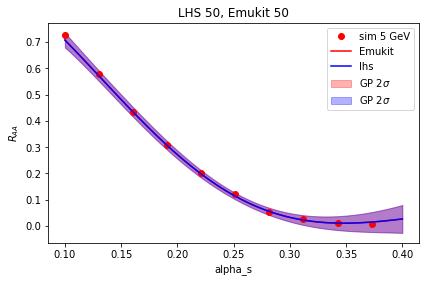

Working on design 3Working on design 4Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.82 minutes


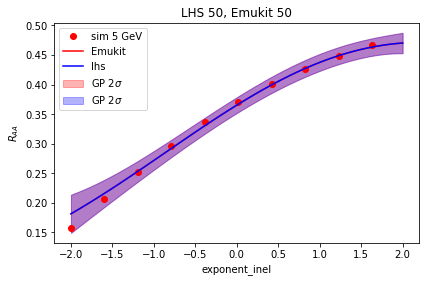

Working on design 4Working on design 3

Working on design 5

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.81 minutes


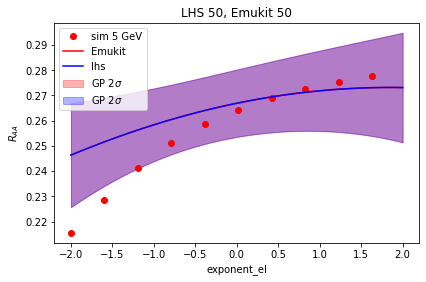

Working on design 3Working on design 4

Working on design 5


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2Working on design 1



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.80 minutes


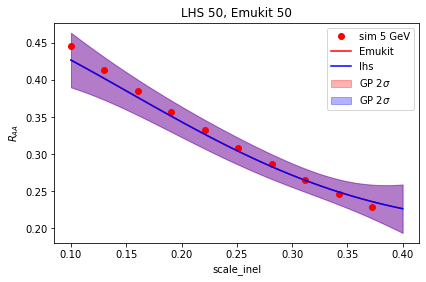

Working on design 3Working on design 4



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 5
Working on design 1Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/pa

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.87 minutes


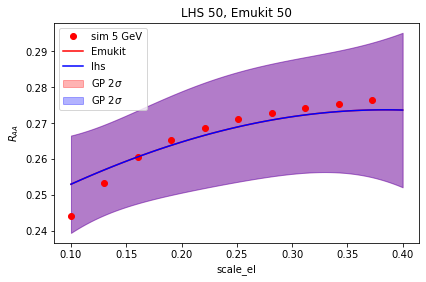

######################
AL before hyperparameters are


Name : GP regression
Objective : -94.34704208476093
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |      0.1611499603392579  |      +ve      |        
  rbf.lengthscale          |                    (5,)  |      +ve      |        
  Gaussian_noise.variance  |  1.3402434288358918e-05  |      +ve      |        
Optimization restart 1/30, f = -94.34704208476221
Optimization restart 2/30, f = -93.93941240062739
Optimization restart 3/30, f = -94.34704208012201
Optimization restart 4/30, f = -94.34704204023049
Optimization restart 5/30, f = -94.34704200897735
Optimization restart 6/30, f = -93.93935414160936
Optimization restart 7/30, f = -94.34704206413389
Optimization restart 8/30, f = -94.34704207538695
Optimization restart 9/30, f = -94.34704208374734
Optimization restart 10/30, f = -

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

For model parameters [ 0.4 -2.   2.   0.4  0.1] takes 166.5284388065338 S
Total run time for the simulations 2.78 minutes
Optimization restart 1/30, f = -100.97382056113267
Optimization restart 2/30, f = -100.9738206186826
Optimization restart 3/30, f = -100.97382061880924
Optimization restart 4/30, f = -100.97382059630023
Optimization restart 5/30, f = -100.9738205779499
Optimization restart 6/30, f = -98.88191625342934
Optimization restart 7/30, f = -100.97382057238514
Optimization restart 8/30, f = -100.97382058255639
Optimization restart 9/30, f = -100.97382061864435
Optimization restart 10/30, f = -100.97382061531607
Optimization restart 11/30, f = -100.9738205476371
Optimization restart 12/30, f = -100.97382051546504
Optimization restart 13/30, f = -100.97382061757213
Optimization restart 14/30, f = -98.88187285871992
Optimization restart 15/30, f = -100.9738206171132
Optimization restart 16/30, f = -100.97382056388791
Optimization restart 17/30, f = -100.97382061763483
Optimizat

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8Working on design 9

Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 62.10962677001953 S
Total run time for the simulations 1.43 minutes


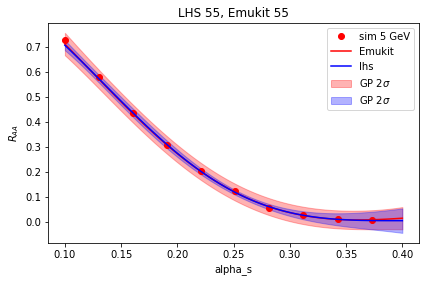

Working on design 3Working on design 4

Working on design 5

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1
Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.82 minutes


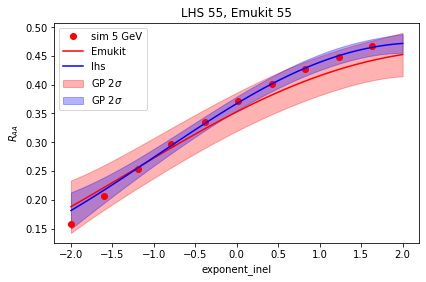

Working on design 4Working on design 3

Working on design 5

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2

Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/pa

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.81 minutes


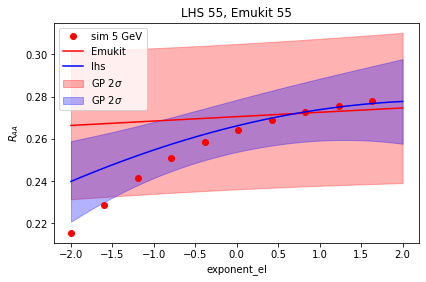

Working on design 2
Working on design 4Working on design 3



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 5

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.98 minutes


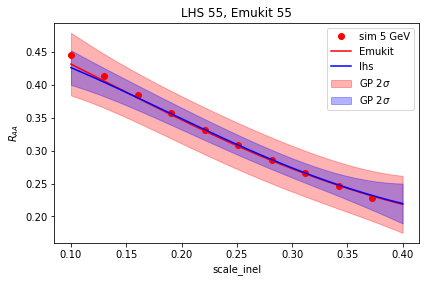

Working on design 3Working on design 4

Working on design 5


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.87 minutes


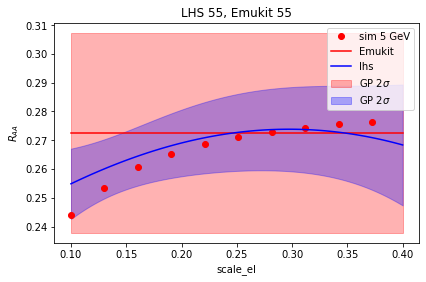

#################### 
 ######################
Validation score for 0 iteration AL 0.020962810767146654 , LHS 0.01493263960138625
######################
AL before hyperparameters are


Name : GP regression
Objective : -102.15645282101113
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |     0.20142791601122356  |      +ve      |        
  rbf.lengthscale          |                    (5,)  |      +ve      |        
  Gaussian_noise.variance  |  0.00023658926718977914  |      +ve      |        
Optimization restart 1/30, f = -102.15645282434284
Optimization restart 2/30, f = -102.15582255035096
Optimization restart 3/30, f = -100.97382061851906


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 4/30, f = -100.97382061882833
Optimization restart 5/30, f = -100.97382060494243
Optimization restart 6/30, f = -100.97382061787165
Optimization restart 7/30, f = -100.97382061649586
Optimization restart 8/30, f = -100.97382053541199
Optimization restart 9/30, f = -100.9738206137941
Optimization restart 10/30, f = -61.28469473671596
Optimization restart 11/30, f = -98.88211085771927
Optimization restart 12/30, f = -100.97382061376116
Optimization restart 13/30, f = -100.97382061872308
Optimization restart 14/30, f = -100.97382060098877
Optimization restart 15/30, f = -61.28469543135853
Optimization restart 16/30, f = -100.97382056158446
Optimization restart 17/30, f = -100.97382060656024
Optimization restart 18/30, f = -100.97382059786472
Optimization restart 19/30, f = -100.97382054598464
Optimization restart 20/30, f = -100.97382061839942
Optimization restart 21/30, f = -100.97382060639588
Optimization restart 22/30, f = -100.97382060572492
Optimization restart 2

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2Working on design 1

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

For model parameters [ 0.4         2.         -2.          0.1         0.11659054] takes 170.98496913909912 S
Total run time for the simulations 2.85 minutes
Optimization restart 1/30, f = -112.96357108308779
Optimization restart 2/30, f = -110.0310347492361
Optimization restart 3/30, f = -110.03103477969653
Optimization restart 4/30, f = -110.0310347831414
Optimization restart 5/30, f = -110.03103473739712
Optimization restart 6/30, f = -110.03103477125842
Optimization restart 7/30, f = -110.03103477717819
Optimization restart 8/30, f = -110.0310347667342
Optimization restart 9/30, f = -110.03103477935232
Optimization restart 10/30, f = -110.0310347685122
Optimization restart 11/30, f = -110.03103450820396
Optimization restart 12/30, f = -110.03103477426012
Optimization restart 13/30, f = -110.03103464485964
Optimization restart 14/30, f = -110.03103477860745
Optimization restart 15/30, f = -110.03103474543107
Optimization restart 16/30, f = -110.03103478252477
Optimization restart 17

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/GPy/kern/src/stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Optimization restart 18/30, f = -110.03103477531477
Optimization restart 19/30, f = -110.03103477629844
Optimization restart 20/30, f = -110.03103472331907
Optimization restart 21/30, f = -110.03103478285313
Optimization restart 22/30, f = -110.03103466888244
Optimization restart 23/30, f = -110.03103477700296
Optimization restart 24/30, f = -110.03103478391971
Optimization restart 25/30, f = -110.03103478393544
Optimization restart 26/30, f = -112.96357066135973
Optimization restart 27/30, f = -110.03103477628257
Optimization restart 28/30, f = -110.03103478424188
Optimization restart 29/30, f = -110.03103473203781
Optimization restart 30/30, f = -110.03103448544454
######################
AL After hyperparameters are 


Name : GP regression
Objective : -112.96357108308779
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |    0.2093871567516

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 62.94233798980713 S
Total run time for the simulations 1.45 minutes


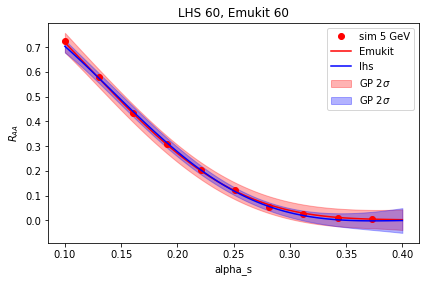

Working on design 1Working on design 3



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 4

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2Working on design 5




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/pa

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.81 minutes


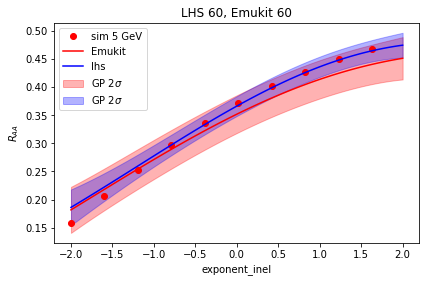

Working on design 3Working on design 4Working on design 5




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1
Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.81 minutes


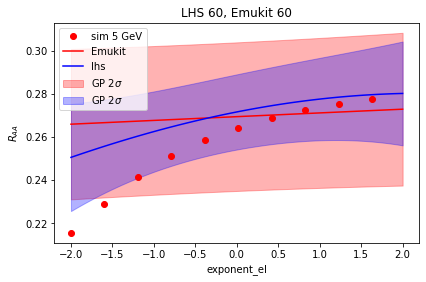

Working on design 2Working on design 4Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small



Working on design 1Working on design 3



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/pa

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.80 minutes


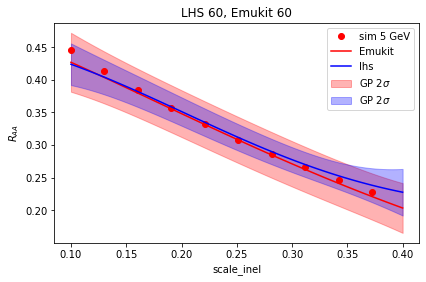

Working on design 4Working on design 3Working on design 5




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.86 minutes


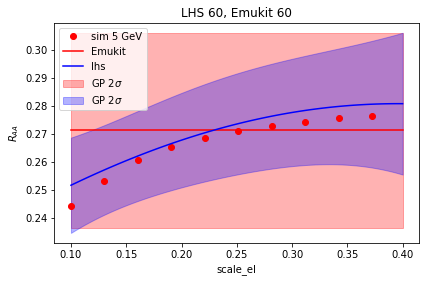

#################### 
 ######################
Validation score for 1 iteration AL 0.020712325217529807 , LHS 0.01324767635920674
######################
AL before hyperparameters are


Name : GP regression
Objective : -112.96357108308779
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |    0.20938715675168476  |      +ve      |        
  rbf.lengthscale          |                   (5,)  |      +ve      |        
  Gaussian_noise.variance  |  0.0002435817882006663  |      +ve      |        
Optimization restart 1/30, f = -112.96357108499662
Optimization restart 2/30, f = -110.03103477637943
Optimization restart 3/30, f = -110.03103474167573


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 4/30, f = -110.03103461841053
Optimization restart 5/30, f = -110.03103478350235
Optimization restart 6/30, f = -110.0310347842161
Optimization restart 7/30, f = -110.03103474869424
Optimization restart 8/30, f = -110.03103477928255
Optimization restart 9/30, f = -110.03103478308577
Optimization restart 10/30, f = -110.03103475611634
Optimization restart 11/30, f = -110.03103477994229
Optimization restart 12/30, f = -110.03103476354478
Optimization restart 13/30, f = -110.03103469260232
Optimization restart 14/30, f = -110.0310347726703
Optimization restart 15/30, f = -110.03103477702257
Optimization restart 16/30, f = -108.27669215189826
Optimization restart 17/30, f = -110.03103478414553
Optimization restart 18/30, f = -112.96357122776291
Optimization restart 19/30, f = -110.03103478187094
Optimization restart 20/30, f = -110.03103478303942
Optimization restart 21/30, f = -110.03103477811982
Optimization restart 22/30, f = -110.03103478064301
Optimization restart

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

For model parameters [ 0.29044037  2.         -0.67635228  0.1         0.39462677] takes 64.76498746871948 S
For model parameters [ 0.4        -2.          2.          0.25171337  0.28102695] takes 101.70022583007812 S
Total run time for the simulations 1.70 minutes
Optimization restart 1/30, f = -119.70527329729208
Optimization restart 2/30, f = -120.42388253320829
Optimization restart 3/30, f = -120.42388217419297
Optimization restart 4/30, f = -120.42388252362647
Optimization restart 5/30, f = -120.42388254028783
Optimization restart 6/30, f = -120.42388252898262
Optimization restart 7/30, f = -120.42388251744337
Optimization restart 8/30, f = -120.42388254053505
Optimization restart 9/30, f = -120.42388253820548
Optimization restart 10/30, f = -120.423882535953
Optimization restart 11/30, f = -120.42388253943085
Optimization restart 12/30, f = -120.4238823407514
Optimization restart 13/30, f = -116.81880084191489
Optimization restart 14/30, f = -120.42388254048694
Optimization rest

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add


Optimization restart 26/30, f = -120.42388254008975
Optimization restart 27/30, f = -120.42388253727148
Optimization restart 28/30, f = -120.4238825268315
Optimization restart 29/30, f = -120.4238825376036
Optimization restart 30/30, f = -120.42388250363254
######################
AL After hyperparameters are 


Name : GP regression
Objective : -120.42388254053505
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |     0.1465600271737008  |      +ve      |        
  rbf.lengthscale          |                   (5,)  |      +ve      |        
  Gaussian_noise.variance  |  4.624960309651148e-05  |      +ve      |        
######################
LHS before hyperparameters are


Name : GP regression
Objective : -137.2103377669724
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |  

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2Working on design 1



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 62.19137263298035 S
Total run time for the simulations 1.43 minutes


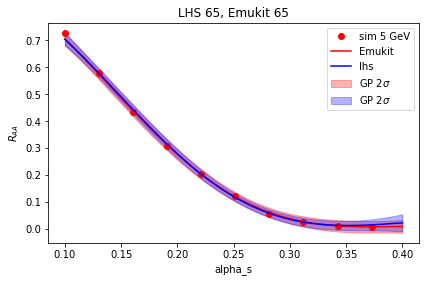

Working on design 3
Working on design 4Working on design 5


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small



Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.81 minutes


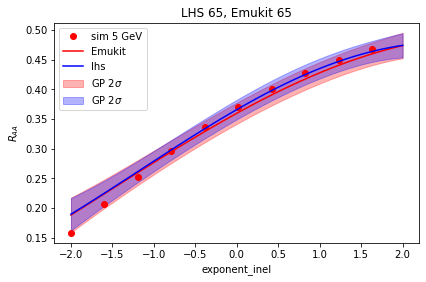

Working on design 4Working on design 3
Working on design 5


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.81 minutes


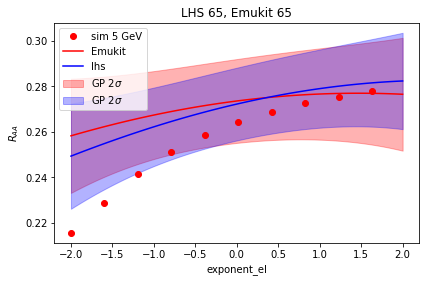

Working on design 3Working on design 4

Working on design 5


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7Working on design 8

Working on design 9
Working on design 10
Total run time for the simulations 0.82 minutes


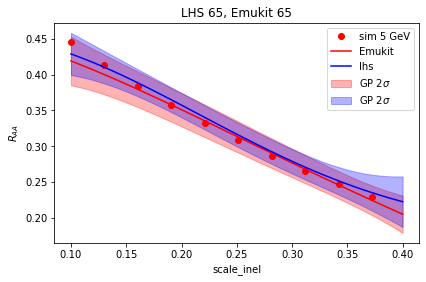

Working on design 4Working on design 3

Working on design 5


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.87 minutes


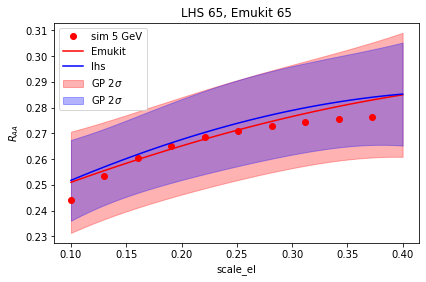

#################### 
 ######################
Validation score for 2 iteration AL 0.01345534367378256 , LHS 0.012211517590708624
######################
AL before hyperparameters are


Name : GP regression
Objective : -120.42388254053505
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |     0.1465600271737008  |      +ve      |        
  rbf.lengthscale          |                   (5,)  |      +ve      |        
  Gaussian_noise.variance  |  4.624960309651148e-05  |      +ve      |        
Optimization restart 1/30, f = -120.42388254053516
Optimization restart 2/30, f = -120.42388253193002
Optimization restart 3/30, f = -120.4238825032941
Optimization restart 4/30, f = -120.42388254034626
Optimization restart 5/30, f = -120.42388250270074
Optimization restart 6/30, f = -120.42388252736774
Optimization restart 7/30, f = -120.42388252691596
O

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small



Working on design 1

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small



Working on design 5

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Total run time for the simulations 0.40 minutes
Optimization restart 1/30, f = -126.5380800091273
Optimization restart 2/30, f = -126.53808000195541
Optimization restart 3/30, f = -125.90805658802367
Optimization restart 4/30, f = -126.53807998933628
Optimization restart 5/30, f = -126.53808000927701
Optimization restart 6/30, f = -126.53807982979643
Optimization restart 7/30, f = -126.53808000227316
Optimization restart 8/30, f = -126.53807999193998
Optimization restart 9/30, f = -126.53808000749119
Optimization restart 10/30, f = -126.53807998449045
Optimization restart 11/30, f = -126.53807999183311
Optimization restart 12/30, f = -126.53807995995305
Optimization restart 13/30, f = -126.53807997948667
Optimization restart 14/30, f = -125.90853805933645
Optimization restart 15/30, f = -126.53807996681388
Optimization restart 16/30, f = -126.53807998837567
Optimization restart 17/30, f = -126.53807998453001
Optimization restart 18/30, f = -126.53808000912548
Optimization restart 19/30

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 62.39276719093323 S
Total run time for the simulations 1.44 minutes


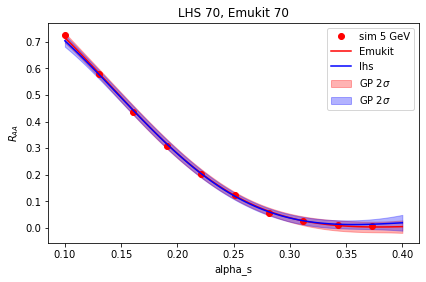

Working on design 3Working on design 5
Working on design 4


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.82 minutes


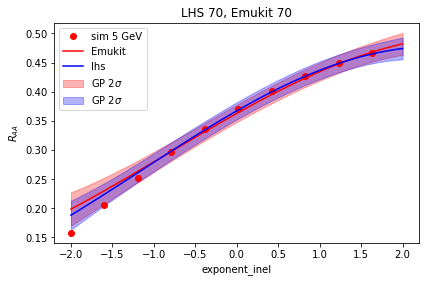

Working on design 3Working on design 4Working on design 5




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.80 minutes


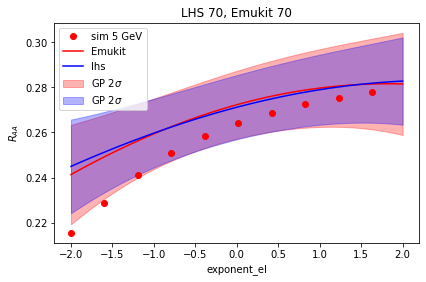

Working on design 3
Working on design 4

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.81 minutes


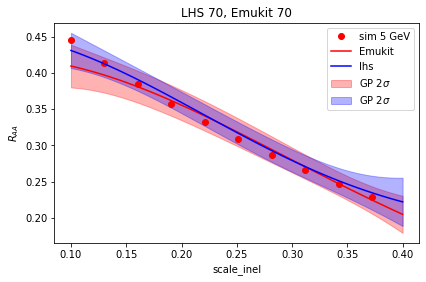

Working on design 3Working on design 5Working on design 4




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.87 minutes


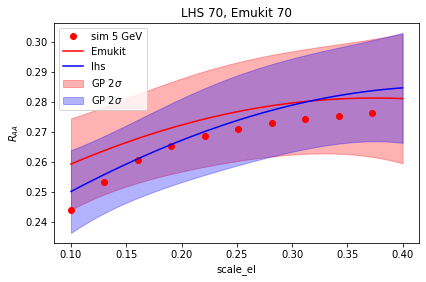

#################### 
 ######################
Validation score for 3 iteration AL 0.013261402575149316 , LHS 0.011530024177558326
######################
AL before hyperparameters are


Name : GP regression
Objective : -126.53808000927701
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |     0.12276208600129535  |      +ve      |        
  rbf.lengthscale          |                    (5,)  |      +ve      |        
  Gaussian_noise.variance  |  2.4044183468472323e-05  |      +ve      |        
Optimization restart 1/30, f = -126.53808000963252
Optimization restart 2/30, f = -126.53807999306406
Optimization restart 3/30, f = -126.53807991507875
Optimization restart 4/30, f = -126.53807975466319
Optimization restart 5/30, f = -126.5380796613739
Optimization restart 6/30, f = -126.53807985435233
Optimization restart 7/30, f = -126.53808000860

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1
Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/pa

For model parameters [0.4 2.  2.  0.1 0.1] takes 111.06154084205627 S
For model parameters [0.4 2.  2.  0.1 0.4] takes 147.395920753479 S
For model parameters [ 0.4 -2.  -2.   0.4  0.1] takes 167.10565304756165 S
Total run time for the simulations 2.79 minutes
Optimization restart 1/30, f = -133.52973220359206
Optimization restart 2/30, f = -133.5297323339664
Optimization restart 3/30, f = -133.5297321472301
Optimization restart 4/30, f = -133.52973237527698
Optimization restart 5/30, f = -133.52973237878598
Optimization restart 6/30, f = -133.529732381381
Optimization restart 7/30, f = -133.52973237994001
Optimization restart 8/30, f = -133.52973232405034
Optimization restart 9/30, f = -133.5297323793248
Optimization restart 10/30, f = -133.52973207591245
Optimization restart 11/30, f = -133.52973235247282
Optimization restart 12/30, f = -133.52973237570382
Optimization restart 13/30, f = -133.529732381766
Optimization restart 14/30, f = -133.5297323281191
Optimization restart 15/30, 

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 62.88819932937622 S
Total run time for the simulations 1.45 minutes


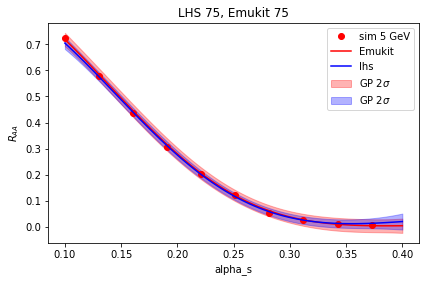

Working on design 3Working on design 4Working on design 5




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1
Working on design 2

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.82 minutes


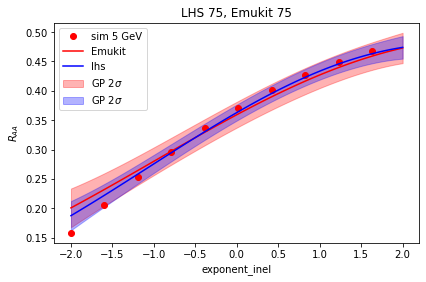

Working on design 3
Working on design 4Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.80 minutes


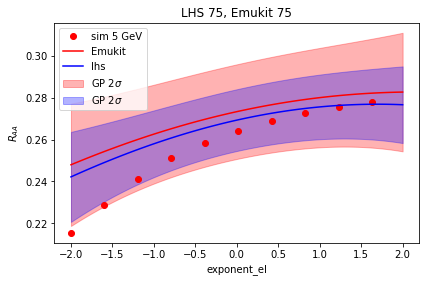

Working on design 3Working on design 4
Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2Working on design 1



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 10
Working on design 9
Total run time for the simulations 0.80 minutes


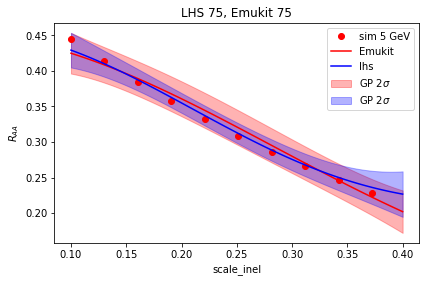

Working on design 3Working on design 4Working on design 2




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.86 minutes


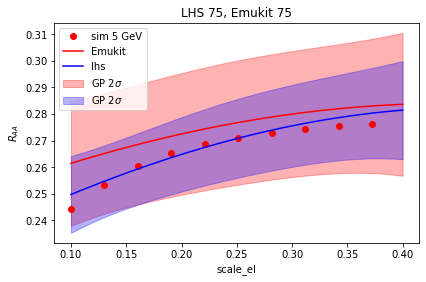

#################### 
 ######################
Validation score for 4 iteration AL 0.01449202747845345 , LHS 0.01124158590964936
######################
AL before hyperparameters are


Name : GP regression
Objective : -133.52973238222387
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |    0.12098327429764921  |      +ve      |        
  rbf.lengthscale          |                   (5,)  |      +ve      |        
  Gaussian_noise.variance  |  7.751380171071229e-05  |      +ve      |        
Optimization restart 1/30, f = -133.52973238224243
Optimization restart 2/30, f = -133.52973238160305
Optimization restart 3/30, f = -133.529732376533
Optimization restart 4/30, f = -133.5297323823093
Optimization restart 5/30, f = -133.52973236275696
Optimization restart 6/30, f = -133.52973238192516
Optimization restart 7/30, f = -133.52973233090958
Opti

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

For model parameters [ 0.4 -2.   2.   0.4  0.4] takes 156.253511428833 S
For model parameters [ 0.4  2.  -2.   0.1  0.4] takes 214.60411620140076 S
Total run time for the simulations 3.58 minutes
Optimization restart 1/30, f = -141.62034013948613
Optimization restart 2/30, f = -141.62034082881772
Optimization restart 3/30, f = -141.6203406260583
Optimization restart 4/30, f = -141.62034053520472
Optimization restart 5/30, f = -141.62034079040708
Optimization restart 6/30, f = -141.62034026285863
Optimization restart 7/30, f = -141.62034057316498
Optimization restart 8/30, f = -141.6203406410109
Optimization restart 9/30, f = -11.370452990616386
Optimization restart 10/30, f = -141.6203395728653


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add


Optimization restart 11/30, f = -141.6203408760812
Optimization restart 12/30, f = -141.62034083378063
Optimization restart 13/30, f = -141.6203404149289
Optimization restart 14/30, f = -141.62034080416674
Optimization restart 15/30, f = -141.62034054965997
Optimization restart 16/30, f = -141.62033956037294
Optimization restart 17/30, f = -141.62034091290343
Optimization restart 18/30, f = -141.6203408736497
Optimization restart 19/30, f = -141.62034080106162
Optimization restart 20/30, f = -141.62034062011963
Optimization restart 21/30, f = -141.62034001607748
Optimization restart 22/30, f = -141.6203403905181
Optimization restart 23/30, f = -141.61932380569885
Optimization restart 24/30, f = -141.62034083428534
Optimization restart 25/30, f = -141.6203387937986
Optimization restart 26/30, f = -141.62034061891703
Optimization restart 27/30, f = -141.62034069117243
Optimization restart 28/30, f = -141.62034092120584
Optimization restart 29/30, f = -141.6203404779597
Optimization resta

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small



Working on design 2

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 63.60340237617493 S
Total run time for the simulations 1.46 minutes


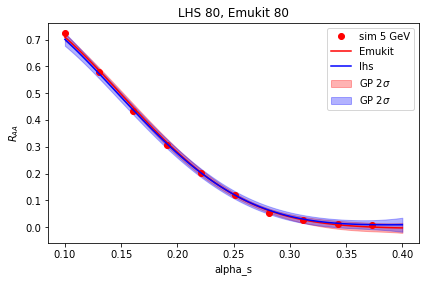

Working on design 5Working on design 4

Working on design 3


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2Working on design 1



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.82 minutes


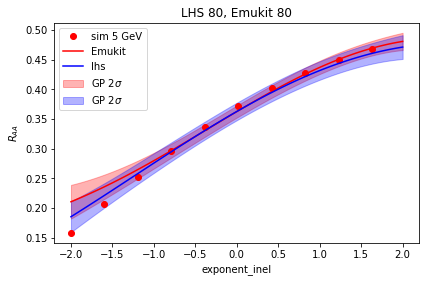

Working on design 3Working on design 4
Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.82 minutes


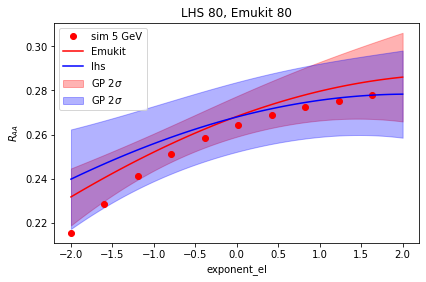

Working on design 3Working on design 4

Working on design 5

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2

Working on design 1

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.80 minutes


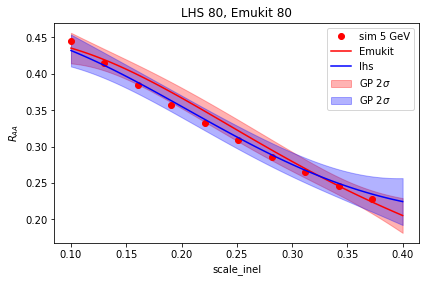

Working on design 3Working on design 4

Working on design 5


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.86 minutes


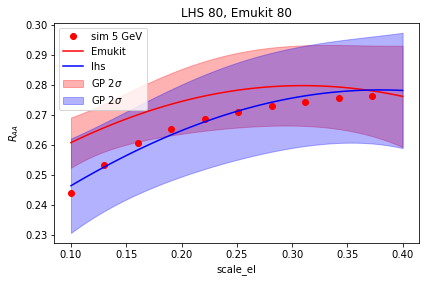

#################### 
 ######################
Validation score for 5 iteration AL 0.013759466313430765 , LHS 0.011925159265660326
######################
AL before hyperparameters are


Name : GP regression
Objective : -141.62034092120584
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |    0.09905647136071577  |      +ve      |        
  rbf.lengthscale          |                   (5,)  |      +ve      |        
  Gaussian_noise.variance  |  1.835442000034384e-12  |      +ve      |        
Optimization restart 1/30, f = -141.62034092356163
Optimization restart 2/30, f = -141.6203408346453
Optimization restart 3/30, f = -141.6203072331615
Optimization restart 4/30, f = -141.62034083595972
Optimization restart 5/30, f = -141.62033413978412
Optimization restart 6/30, f = -141.62034064051085
Optimization restart 7/30, f = -141.62033995476764
O

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Total run time for the simulations 0.67 minutes
Optimization restart 1/30, f = -147.43450654137882
Optimization restart 2/30, f = -149.23446105259012
Optimization restart 3/30, f = -149.23446103027746
Optimization restart 4/30, f = -149.23446106653967
Optimization restart 5/30, f = -149.23446106556514
Optimization restart 6/30, f = -149.23446106466793
Optimization restart 7/30, f = -149.23446092462868
Optimization restart 8/30, f = -149.23446046589694
Optimization restart 9/30, f = -149.23446104033866
Optimization restart 10/30, f = -149.2344610667585
Optimization restart 11/30, f = -149.23446106645844
Optimization restart 12/30, f = -149.23446099737234
Optimization restart 13/30, f = -149.2344610646988
Optimization restart 14/30, f = -149.2344610640417
Optimization restart 15/30, f = -149.23446105262605
Optimization restart 16/30, f = -149.23446105266206
Optimization restart 17/30, f = -149.23446097984296
Optimization restart 18/30, f = -149.2344606694171
Optimization restart 19/30, f

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2Working on design 1

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 62.95594906806946 S
Total run time for the simulations 1.45 minutes


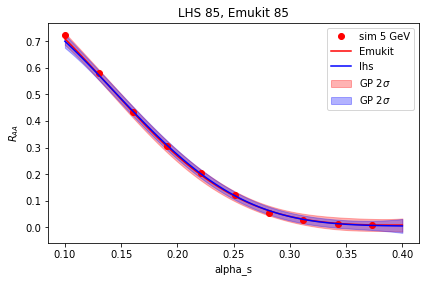

Working on design 3Working on design 4

Working on design 5


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.82 minutes


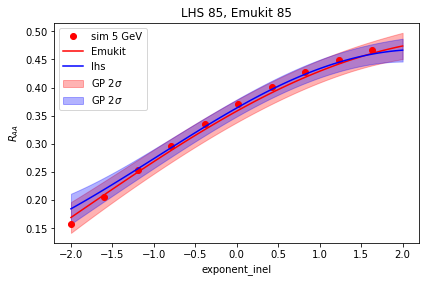

Working on design 3Working on design 4
Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.81 minutes


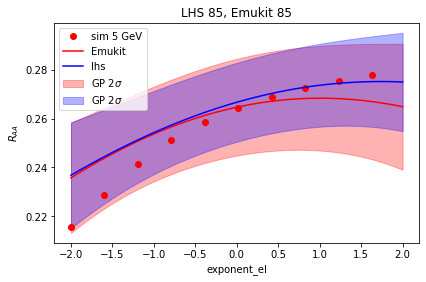

Working on design 3Working on design 4
Working on design 5


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2Working on design 1



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.99 minutes


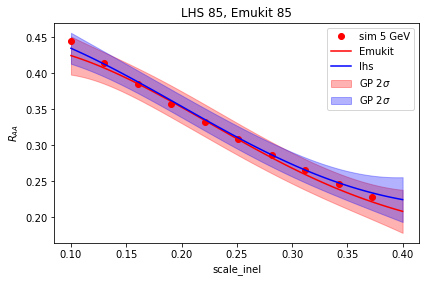

Working on design 4Working on design 5Working on design 3




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1
Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.88 minutes


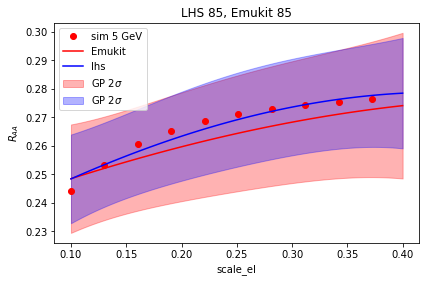

#################### 
 ######################
Validation score for 6 iteration AL 0.01250077899603756 , LHS 0.012433466852587111
######################
AL before hyperparameters are


Name : GP regression
Objective : -149.23446106693638
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |    0.13049071006383597  |      +ve      |        
  rbf.lengthscale          |                   (5,)  |      +ve      |        
  Gaussian_noise.variance  |  5.462982342475879e-05  |      +ve      |        
Optimization restart 1/30, f = -149.2344610669565
Optimization restart 2/30, f = -149.2344607182353
Optimization restart 3/30, f = -149.2344610669308
Optimization restart 4/30, f = -149.23446106410032
Optimization restart 5/30, f = -149.23446103375602
Optimization restart 6/30, f = -149.23446103004753
Optimization restart 7/30, f = -149.23446097834932
Opt

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 3Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

For model parameters [ 0.30987123 -2.          2.          0.4         0.1       ] takes 100.13780570030212 S
Total run time for the simulations 1.67 minutes
Optimization restart 1/30, f = -158.15618487340984
Optimization restart 2/30, f = -158.1561848755266
Optimization restart 3/30, f = -158.15618486831335
Optimization restart 4/30, f = -158.1561848700332
Optimization restart 5/30, f = -158.15618482876502
Optimization restart 6/30, f = -158.1561847857796
Optimization restart 7/30, f = -158.1561848761306
Optimization restart 8/30, f = -158.15618487861605
Optimization restart 9/30, f = -158.15618461186847
Optimization restart 10/30, f = -158.15618475084705
Optimization restart 11/30, f = -158.1561846240095
Optimization restart 12/30, f = -158.1561842718746
Optimization restart 13/30, f = -158.15618485728368
Optimization restart 14/30, f = -158.15618486814776
Optimization restart 15/30, f = -158.15618478701154
Optimization restart 16/30, f = -158.15618470760617
Optimization restart 17/3

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 3Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 62.98143267631531 S
Total run time for the simulations 1.46 minutes


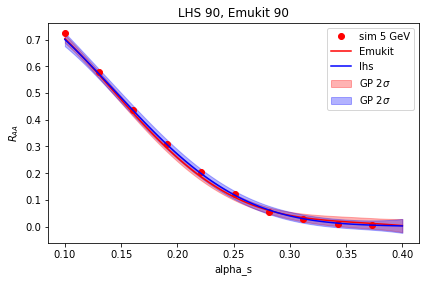

Working on design 4
Working on design 3Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.82 minutes


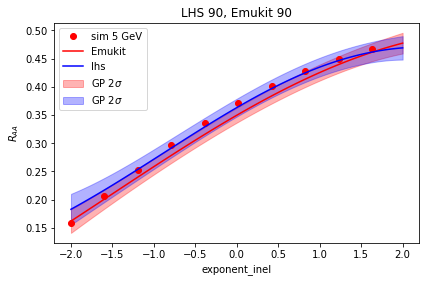

Working on design 3Working on design 4

Working on design 5

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.82 minutes


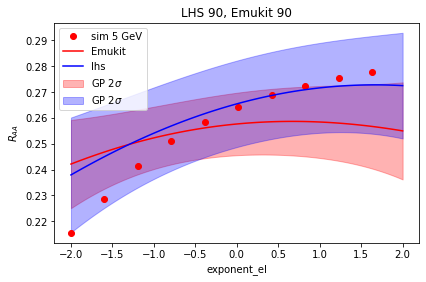

Working on design 3Working on design 4
Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2
Working on design 1

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.80 minutes


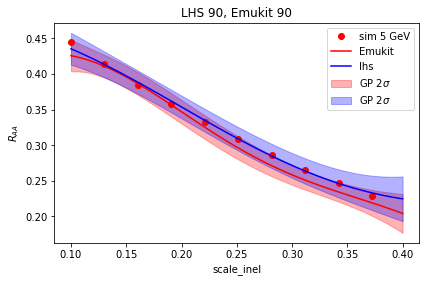

Working on design 3Working on design 4
Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.87 minutes


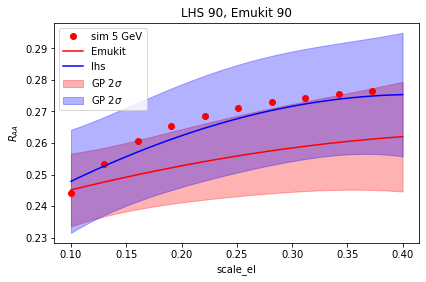

#################### 
 ######################
Validation score for 7 iteration AL 0.014147884726870933 , LHS 0.010881885293116601
######################
AL before hyperparameters are


Name : GP regression
Objective : -158.15618487861605
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |     0.11023927510857248  |      +ve      |        
  rbf.lengthscale          |                    (5,)  |      +ve      |        
  Gaussian_noise.variance  |  1.2314211536281768e-05  |      +ve      |        
Optimization restart 1/30, f = -158.15618487869318
Optimization restart 2/30, f = -158.15618486660867
Optimization restart 3/30, f = -158.15618487367817
Optimization restart 4/30, f = -158.156184822287
Optimization restart 5/30, f = -158.15618487458008
Optimization restart 6/30, f = -158.1561848753334
Optimization restart 7/30, f = -158.1561848744742

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small



Working on design 1Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/env

Total run time for the simulations 0.53 minutes
Optimization restart 1/30, f = -149.05501678287268
Optimization restart 2/30, f = -151.5086475336912
Optimization restart 3/30, f = -151.5086475889705
Optimization restart 4/30, f = -151.50864762051918
Optimization restart 5/30, f = -151.5086476198801
Optimization restart 6/30, f = -151.5086476312644
Optimization restart 7/30, f = -151.50864761271714
Optimization restart 8/30, f = -151.50864763167021
Optimization restart 9/30, f = -151.50864762960617
Optimization restart 10/30, f = -151.50864759855014
Optimization restart 11/30, f = -151.50864760225056
Optimization restart 12/30, f = -151.50864759259005
Optimization restart 13/30, f = -151.5086476006245
Optimization restart 14/30, f = -151.50864696950035
Optimization restart 15/30, f = -151.50864761237074
Optimization restart 16/30, f = -151.50864760068126
Optimization restart 17/30, f = -151.50864763433805
Optimization restart 18/30, f = -151.50864760459456
Optimization restart 19/30, f 

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1
Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 62.473939180374146 S
Total run time for the simulations 1.45 minutes


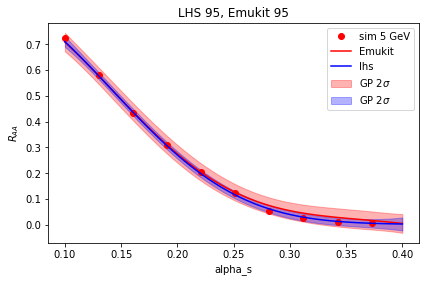

Working on design 3Working on design 4



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 5

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small



Working on design 1
Working on design 2

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.81 minutes


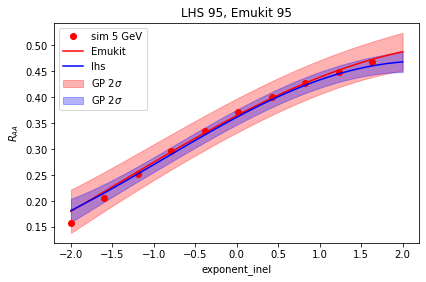

Working on design 3
Working on design 4
Working on design 5


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.81 minutes


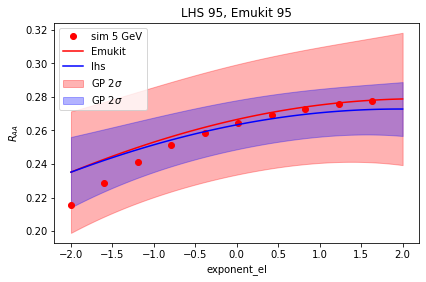

Working on design 3Working on design 4



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 5
Working on design 2
Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/env

Working on design 6
Working on design 7
Working on design 8Working on design 9

Working on design 10
Total run time for the simulations 0.80 minutes


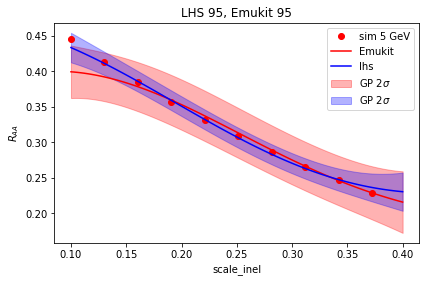

Working on design 3Working on design 4Working on design 5




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.86 minutes


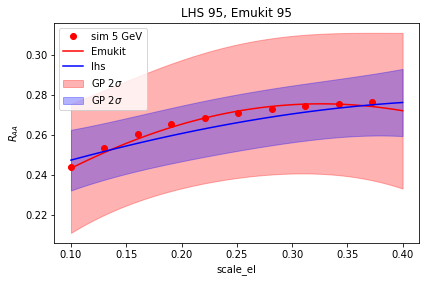

#################### 
 ######################
Validation score for 8 iteration AL 0.01467009870654262 , LHS 0.010504923778858366
######################
AL before hyperparameters are


Name : GP regression
Objective : -151.50864763480453
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |     0.10558628788161227  |      +ve      |        
  rbf.lengthscale          |                    (5,)  |      +ve      |        
  Gaussian_noise.variance  |  0.00017540480236672438  |      +ve      |        
Optimization restart 1/30, f = -151.508647634903
Optimization restart 2/30, f = -151.50864763265525
Optimization restart 3/30, f = -151.50864763467584
Optimization restart 4/30, f = -151.50864762977363
Optimization restart 5/30, f = -151.50864740698353
Optimization restart 6/30, f = -151.50864763307985
Optimization restart 7/30, f = -151.5086476343877

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 3




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/pa

Total run time for the simulations 0.46 minutes
Optimization restart 1/30, f = -159.481220101053
Optimization restart 2/30, f = -159.48122008789042
Optimization restart 3/30, f = -159.4812197518741
Optimization restart 4/30, f = -159.48122009558932
Optimization restart 5/30, f = -157.80208919441228
Optimization restart 6/30, f = -159.48121995241212
Optimization restart 7/30, f = -159.48122008554736
Optimization restart 8/30, f = -159.48122010171969
Optimization restart 9/30, f = -159.48122010054055
Optimization restart 10/30, f = -159.48122004566494
Optimization restart 11/30, f = -159.48122010170923
Optimization restart 12/30, f = -159.48122010087113
Optimization restart 13/30, f = -159.48122006637206
Optimization restart 14/30, f = -159.4812200629633
Optimization restart 15/30, f = -159.4812200513379
Optimization restart 16/30, f = -159.48121974665452
Optimization restart 17/30, f = -159.48122010160523
Optimization restart 18/30, f = -159.48122006693467
Optimization restart 19/30, f 

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 3Working on design 1
Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/pa

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 62.632184743881226 S
Total run time for the simulations 1.45 minutes


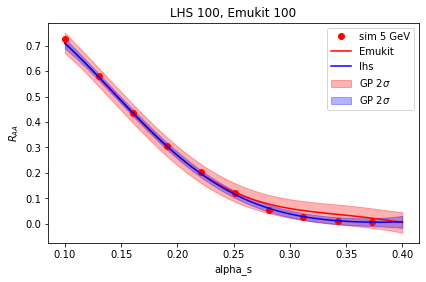

Working on design 3Working on design 2Working on design 1
Working on design 4



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 5


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.81 minutes


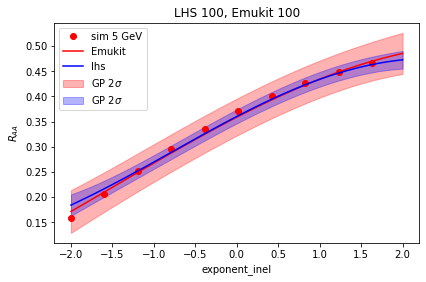

Working on design 2Working on design 5Working on design 3




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1
Working on design 4

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.81 minutes


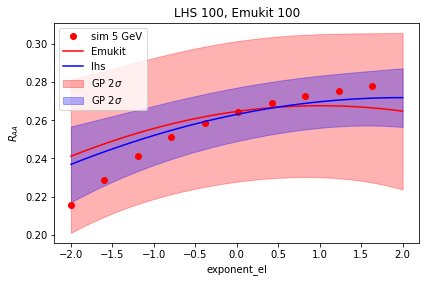

Working on design 4Working on design 3

Working on design 5


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.80 minutes


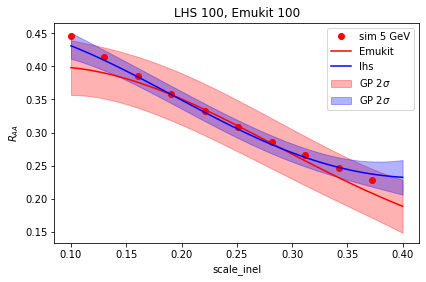

Working on design 3Working on design 4Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small



Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.87 minutes


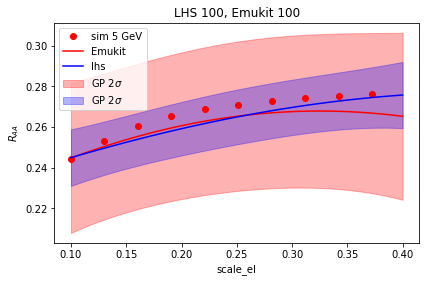

#################### 
 ######################
Validation score for 9 iteration AL 0.015228217254904466 , LHS 0.011071407965056474


In [17]:
import time
time_iter = []
bs = 5

# The active learning GP
GP_al = gp_array[0]
    
 # LHS GP
GP_lhs = gp_array[1]
validation_array = [compare_gp(GP_al, GP_lhs)]
for i in range(0,10):
    st = time.time()
   # val = compare_gp(GP_al, GP_lhs)
    integrated_var = ModelVariance(model = GP_al)
    #integrated_var = IntegratedVarianceReduction(model = GP_al, space=parameter_space)
    expdesign_loop = ExperimentalDesignLoop(model = GP_al,
                                         space = parameter_space,
                                         acquisition = integrated_var,
                                         batch_size = bs)
    print('######################')
    print('AL before hyperparameters are\n')
    print(GP_al.model)
    ed=expdesign_loop.run_loop(f,1)
    print('######################')
    print('AL After hyperparameters are \n')
    print(GP_al.model)    

    GP_lhs.set_data(X_all[:50+bs*(i+1),:], Y_all[:50+bs*(i+1),  pT_obs])
    print('######################')
    print('LHS before hyperparameters are\n')
    print(GP_lhs.model)
    GP_lhs.optimize()
    print('######################')
    print('LHS After hyperparameters are\n')
    print(GP_lhs.model)
    
    print(f'time taken for the iteraton {i} is {time.time()-st} S')
    time_iter.append(time.time()-st)
    val = compare_gp(GP_al, GP_lhs)
    validation_array.append(val)
    print('#################### \n ######################')
    print(f'Validation score for {i} iteration AL {val[0]} , LHS {val[1]}')

In [18]:
validation_array

[[0.015099561963348374, 0.015099553115825668],
 [0.020962810767146654, 0.01493263960138625],
 [0.020712325217529807, 0.01324767635920674],
 [0.01345534367378256, 0.012211517590708624],
 [0.013261402575149316, 0.011530024177558326],
 [0.01449202747845345, 0.01124158590964936],
 [0.013759466313430765, 0.011925159265660326],
 [0.01250077899603756, 0.012433466852587111],
 [0.014147884726870933, 0.010881885293116601],
 [0.01467009870654262, 0.010504923778858366],
 [0.015228217254904466, 0.011071407965056474]]

In [19]:
import pickle

In [20]:
with open('AL_max_var_50_gp' , "wb") as f:
     pickle.dump(gp_array[0], f)  
        
with open('LHS_max_var_50_gp' , "wb") as f:
     pickle.dump(gp_array[1], f)          

In [21]:
#validation_array=[[0.3497645768241527, 0.34976458500000446],[0.36575270735942844,0.3497534104188523 ],
#                  [0.35352686163099667, 0.35025853814758884], [0.35230849297651656, 0.3488757274290061], 
#                  [0.3584138408951724, 0.35098677141337725], [0.3553975932062104, 0.35002306060731153],
#                  [0.3594979596555886, 0.34867549612713167], [0.358482274744484, 0.3490797225497127],
#                  [0.3594827634866655, 0.35101044459585395]]

In [22]:
#import numpy as np
#import matplotlib.pyplot as plt

Text(0.5, 0, 'Number of training points')

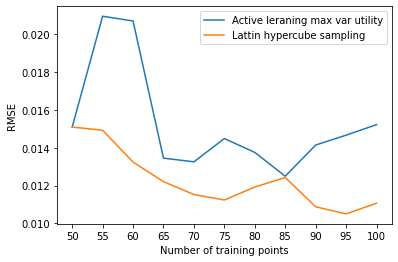

In [23]:
validation_array = np.array(validation_array)
fig, ax = plt.subplots()
n_train = np.arange(start_n,105,5)
ax.plot(n_train, validation_array[:,0], label = 'Active leraning max var utility')
ax.plot(n_train, validation_array[:,1], label = 'Lattin hypercube sampling')
ax.set_xticks(n_train)
ax.legend()
ax.set_ylabel('RMSE')
ax.set_xlabel('Number of training points')

Text(0.5, 0, 'Number of training points')

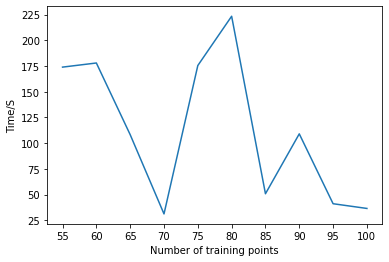

In [24]:
time_ar = np.array(time_iter)
fig, ax = plt.subplots()
n_train = np.arange(55,105,5)
ax.plot(n_train, time_ar, label = 'Active leraning time')
ax.set_xticks(n_train)
ax.set_ylabel('Time/S')
ax.set_xlabel('Number of training points')

In [25]:
AL_design = GP_al.X[start_n:,:]
print(AL_design.shape)

(50, 5)


In [26]:
c_l = np.array([i*np.ones(bs) for i in np.arange(0,AL_design.shape[0],bs)]).reshape(-1,1)

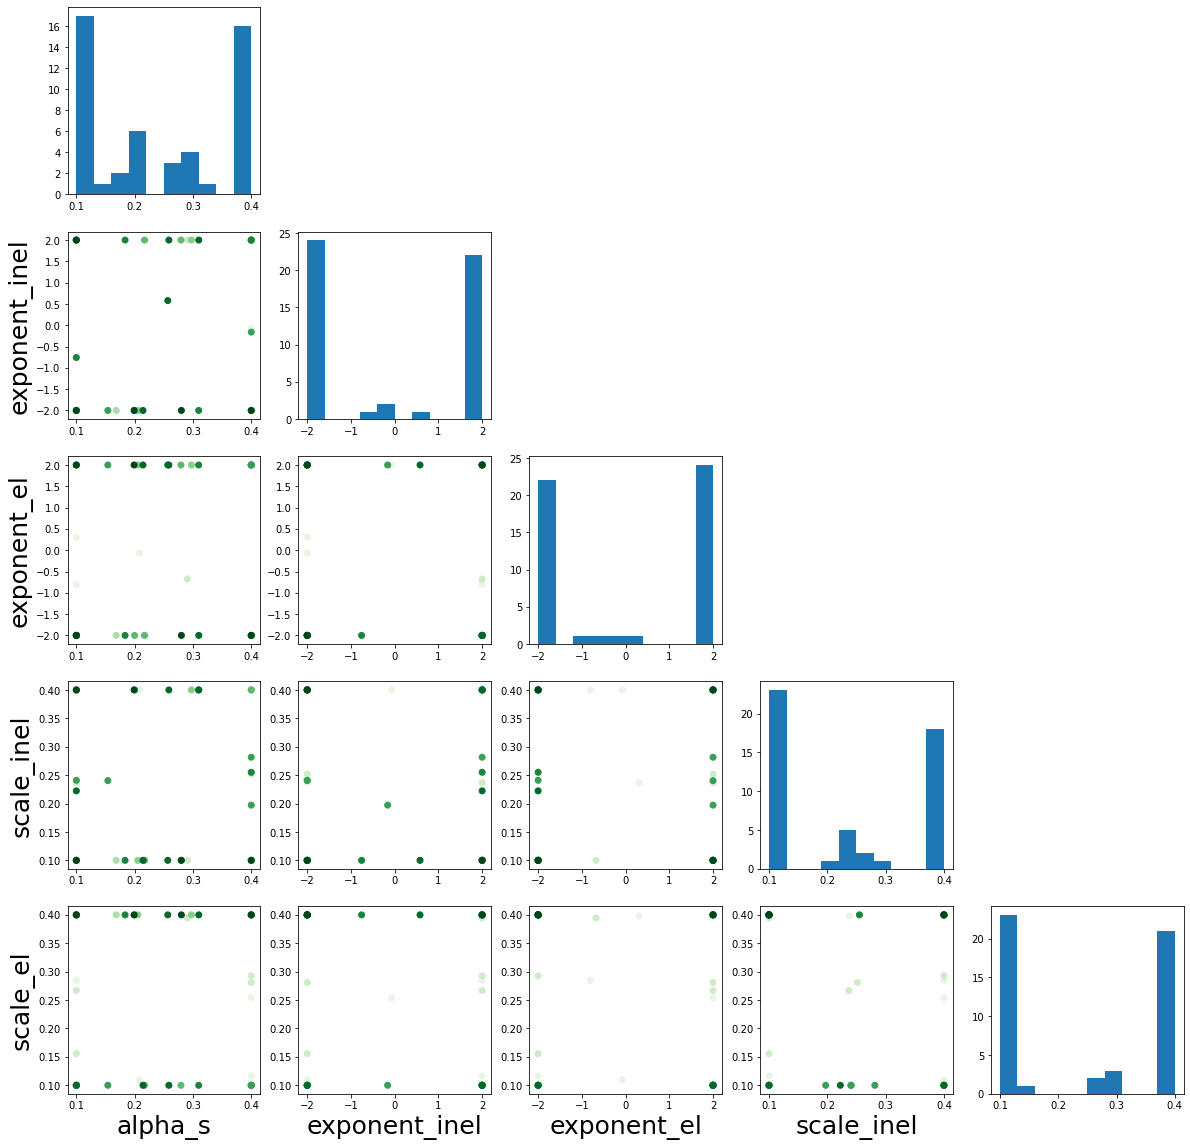

In [27]:
import matplotlib
matplotlib.rcParams.update({'font.size': 10})
fig, axs= plt.subplots(5,5, figsize=(20,20))
for row in range(0,5):
    for clmn in range(0,5):
        if row < clmn:
            ax = axs[row,clmn]
            ax.axis('off')
            continue
        if row == clmn:
            ax = axs[row,clmn]
            ax.hist(AL_design[:,clmn])
        else:
            ax= axs[row,clmn]
            if row == 4:
                ax.set_xlabel(list(prior_ranges.keys())[clmn], fontsize =25)
            if clmn == 0:
                ax.set_ylabel(list(prior_ranges.keys())[row], fontsize =25)
            ax.scatter(AL_design[:,clmn],AL_design[:,row], c = c_l, cmap='Greens')